# Import Library

In [63]:
import id_aldo
import requests
import datetime
import id_beritagar as indo
from pprint import pprint
from bs4 import BeautifulSoup
from tqdm import tqdm, tqdm_notebook
from textacy.preprocess import  preprocess_text

# Set Default Variable

# Get Data with Scrapping Method
## Data From Tempo.co

In [64]:
url = '''https://www.tempo.co/indeks/2019/12/15/tekno'''
response = requests.get(url).text
soup = BeautifulSoup(response, "html5lib")

In [65]:
# Get Content
contents = soup.select('.list.list-type-1 > ul > li')

### Result of Contents

In [66]:
contents

[<li>
 					 <div class="card card-type-1">
 						 <div class="wrapper clearfix">
 							 <a class="col" href="https://tekno.tempo.co/read/1284017/pks-dukung-nadiem-hapus-ujian-nasional-dengan-catatan-keras">
 								 <img src="https://statik.tempo.co/data/2019/12/10/id_896354/896354_400.jpg"/>
 							 </a>
 							 <a class="col" href="https://tekno.tempo.co/read/1284017/pks-dukung-nadiem-hapus-ujian-nasional-dengan-catatan-keras">
 								 <h2 class="title">PKS Dukung Nadiem Hapus Ujian Nasional dengan Catatan Keras</h2>
 								 <p>PKS mendukung rencana Mendikbud Nadiem Makarim menghapus Ujian Nasional dengan sejumlah catatan keras.</p>
 								 <span class="col">15 Desember 2019 18:35 WIB</span>
 							 </a>
 						 </div>
 					 </div>
 				 </li>, <li>
 					 <div class="card card-type-1">
 						 <div class="wrapper clearfix">
 							 <a class="col" href="https://tekno.tempo.co/read/1284005/gempa-magnitudo-6-9-di-mindanao-terasa-sampai-sulawesi-utara">
 								 <img sr

### Clean HTML

In [67]:
# Save the Data Into List with Json Format
data = []
for content in tqdm(contents):
    urlTempo = content.select_one('a')['href']
    categoryTempo = url.split('/')[7]
    titleTempo = content.select_one('.title').text
    dateTempo = url.split('/')[6] + '-' + url.split('/')[5] + '-' + url.split('/')[4]
    
    json = {
        'category': categoryTempo,
        'title': titleTempo,
        'description': '',
        'url': urlTempo,
        'content': '',
        'img': '',
        'subCategory': '',
        'publishedAt': dateTempo,
        'source': 'tempo.co',
        'cleanContent': ''
    }
    
    data.append(json)

100%|██████████| 10/10 [00:00<00:00, 1446.46it/s]


### Result

In [68]:
print('Total Artikel : {}'.format(len(data)))
print('================================\n')
pprint(data)

Total Artikel : 10

[{'category': 'tekno',
  'cleanContent': '',
  'content': '',
  'description': '',
  'img': '',
  'publishedAt': '15-12-2019',
  'source': 'tempo.co',
  'subCategory': '',
  'title': 'PKS Dukung Nadiem Hapus Ujian Nasional dengan Catatan Keras',
  'url': 'https://tekno.tempo.co/read/1284017/pks-dukung-nadiem-hapus-ujian-nasional-dengan-catatan-keras'},
 {'category': 'tekno',
  'cleanContent': '',
  'content': '',
  'description': '',
  'img': '',
  'publishedAt': '15-12-2019',
  'source': 'tempo.co',
  'subCategory': '',
  'title': 'Gempa Magnitudo 6.9 di Mindanao Terasa Sampai Sulawesi Utara',
  'url': 'https://tekno.tempo.co/read/1284005/gempa-magnitudo-6-9-di-mindanao-terasa-sampai-sulawesi-utara'},
 {'category': 'tekno',
  'cleanContent': '',
  'content': '',
  'description': '',
  'img': '',
  'publishedAt': '15-12-2019',
  'source': 'tempo.co',
  'subCategory': '',
  'title': '4 Badak Jawa Lahir, KLHK: Bukti Taman Nasional Ujung Kulon Aman',
  'url': 'https://

## Get Content Articles

In [69]:
urlContent = data[0]['url']
responseContent = requests.get(urlContent).text
soupContent = BeautifulSoup(responseContent, "html5lib")

In [70]:
# Get Sub Category and Image
subCategory = soupContent.select('.breadcrumbs > li ')[1].text
image = soupContent.select_one('figure > a')['href']

In [71]:
articles = soupContent.select('#isi > p')

### Content of Articles

In [72]:
tempArticle = []
for article in articles: 
    print(article.text.strip() + '\n')
    tempArticle.append(article.text.strip() + '\n\n')

content = ''.join(tempArticle)

TEMPO.CO, Jakarta - Partai Keadilan Sejahtera (PKS) menyatakan mendukung rencana Menteri Pendidikan dan Kebudayaan Nadiem Makarim menghapus Ujian Nasional (UN) dengan sejumlah catatan.

"Kami mendukung dihapuskannya UN, tapi tetap dengan catatan yang keras," kata Wakil Ketua Majelis Syuro PKS Hidayat Nur Wahid usai Rapat Koordinasi Wilayah DPW PKS Jawa Timur di Surabaya, Minggu.

Menteri Pendidikan dan Kebudayaan Nadiem Makarim mengumumkan rencana mengganti UN dengan Asesmen Kompetensi Minimum dan Survei Karakter mulai tahun 2021.

Hidayat mengatakan bahwa sebaiknya pemerintah tidak tergesa-gesa dalam menerapkan kebijakan tersebut. Penerapan kebijakan tersebut, menurut dia, membutuhkan kajian mendalam karena berkaitan dengan pembangunan sumber daya manusia.

"Yang terpenting juga, adanya kebijakan-kebijakan itu dalam rangka mendukung serta mendorong peningkatan kualitas pendidikan, sumber daya manusianya serta efek input maupun output-nya," kata Wakil Ketua MPR tersebut.

Kalau UN diha

### Insert Article Into Data

In [73]:
temp = []
temp = data[0]

In [74]:
temp['img'] = image
temp['subCategory'] = subCategory
temp['content'] = content

### Result

In [75]:
pprint(temp)

{'category': 'tekno',
 'cleanContent': '',
 'content': 'TEMPO.CO, Jakarta -\xa0Partai Keadilan Sejahtera (PKS) menyatakan '
            'mendukung rencana\xa0Menteri Pendidikan\xa0dan Kebudayaan\xa0'
            'Nadiem\xa0Makarim\xa0menghapus Ujian Nasional (UN) dengan '
            'sejumlah catatan.\n'
            '\n'
            '"Kami mendukung\xa0dihapuskannya UN, tapi tetap dengan catatan '
            'yang keras," kata Wakil Ketua Majelis Syuro PKS Hidayat Nur Wahid '
            'usai Rapat Koordinasi Wilayah DPW PKS Jawa Timur di Surabaya, '
            'Minggu.\n'
            '\n'
            'Menteri Pendidikan dan Kebudayaan\xa0Nadiem Makarim mengumumkan '
            'rencana mengganti UN dengan Asesmen Kompetensi Minimum dan Survei '
            'Karakter mulai tahun 2021.\n'
            '\n'
            'Hidayat mengatakan bahwa sebaiknya pemerintah tidak tergesa-gesa '
            'dalam menerapkan kebijakan tersebut. Penerapan kebijakan '
            'tersebut, menu

# Preprocessing

In [76]:
import spacy
from spacy import displacy

In [77]:
nlp = id_aldo.load()

In [78]:
def formatArticle(text=None):
    doc = nlp(text)
    count = 0
    for ent in doc.ents:
        if ent.end <= 5:
            count = ent.end_char + 1
        else:
            count = len(text)

    result = text[count:].strip()

    return result

### Delete Format Publisher

In [79]:
doc = nlp(temp['content'])

In [80]:
displacy.render(doc, jupyter=True, style='ent')

### Result

In [81]:
result = formatArticle(temp['content'])
print(result)

Partai Keadilan Sejahtera (PKS) menyatakan mendukung rencana Menteri Pendidikan dan Kebudayaan Nadiem Makarim menghapus Ujian Nasional (UN) dengan sejumlah catatan.

"Kami mendukung dihapuskannya UN, tapi tetap dengan catatan yang keras," kata Wakil Ketua Majelis Syuro PKS Hidayat Nur Wahid usai Rapat Koordinasi Wilayah DPW PKS Jawa Timur di Surabaya, Minggu.

Menteri Pendidikan dan Kebudayaan Nadiem Makarim mengumumkan rencana mengganti UN dengan Asesmen Kompetensi Minimum dan Survei Karakter mulai tahun 2021.

Hidayat mengatakan bahwa sebaiknya pemerintah tidak tergesa-gesa dalam menerapkan kebijakan tersebut. Penerapan kebijakan tersebut, menurut dia, membutuhkan kajian mendalam karena berkaitan dengan pembangunan sumber daya manusia.

"Yang terpenting juga, adanya kebijakan-kebijakan itu dalam rangka mendukung serta mendorong peningkatan kualitas pendidikan, sumber daya manusianya serta efek input maupun output-nya," kata Wakil Ketua MPR tersebut.

Kalau UN dihapuskan, ia mengataka

## Preprocessing
### Case Folding 

In [82]:
cf = []
formatCF = ['number', 'email', 'usd', 'url']
lowerCase = preprocess_text(result,
                            fix_unicode=True, 
                            lowercase=True, 
                            no_urls=True,
                            no_emails=True,
                            no_phone_numbers=True,
                            no_numbers=True,
                            no_currency_symbols=True,
                            no_punct=True)
caseFolding = lowerCase.split()
[cf.append(case) for case in caseFolding if case not in formatCF]
caseFolding = ' '.join(cf)

print(caseFolding)

partai keadilan sejahtera pks menyatakan mendukung rencana menteri pendidikan dan kebudayaan nadiem makarim menghapus ujian nasional un dengan sejumlah catatan kami mendukung dihapuskannya un tapi tetap dengan catatan yang keras kata wakil ketua majelis syuro pks hidayat nur wahid usai rapat koordinasi wilayah dpw pks jawa timur di surabaya minggu menteri pendidikan dan kebudayaan nadiem makarim mengumumkan rencana mengganti un dengan asesmen kompetensi minimum dan survei karakter mulai tahun hidayat mengatakan bahwa sebaiknya pemerintah tidak tergesa gesa dalam menerapkan kebijakan tersebut penerapan kebijakan tersebut menurut dia membutuhkan kajian mendalam karena berkaitan dengan pembangunan sumber daya manusia yang terpenting juga adanya kebijakan kebijakan itu dalam rangka mendukung serta mendorong peningkatan kualitas pendidikan sumber daya manusianya serta efek input maupun output nya kata wakil ketua mpr tersebut kalau un dihapuskan ia mengatakan sebaiknya pemerintah menyiapkan

## Preprocessing
### Tokenization 

In [24]:
import nltk

In [25]:
tokens = nltk.tokenize.word_tokenize(caseFolding)
print(tokens)

['setelah', 'mengkonfirmasi', 'peluncuran', 'realme', 'x2', 'pro', 'beberapa', 'hari', 'lalu', 'realme', 'mengumumkan', 'akan', 'meluncurkan', 'realme', '5s', 'bersamaan', 'dengan', 'dengan', 'realme', 'x2', 'pro', 'rabu', 'lusa', 'november', 'kali', 'ini', 'kami', 'membawa', 'ke', 'tingkat', 'yang', 'lebih', 'tinggi', 'melalui', 'konfigurasi', 'ai', 'quad', 'camera', '48mp', 'yang', 'benar', 'benar', 'baru', 'demi', 'memberikan', 'pengalaman', 'mobile', 'photography', 'berdefinisi', 'tinggi', 'layaknya', 'kelas', 'flagship', 'yaitu', 'realme', '5s', 'ujar', 'senior', 'brand', 'manager', 'realme', 'indonesia', 'palson', 'yi', 'dalam', 'keterangannya', 'senin', 'november', 'realme', '5s', 'akan', 'membawa', 'ciri', 'khas', 'realme', 'mulai', 'dari', 'baterai', 'besar', 'prosesor', 'yang', 'kuat', 'di', 'kelasnya', 'dan', 'quad', 'camera', 'sistem', 'mp', 'quad', 'camera', 'terbaru', 'dari', 'realme', '5s', 'dapat', 'mengambil', 'foto', 'resolusi', 'tinggi', '8000x6000', 'piksel', 'sehin

In [26]:
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())

[('realme', 16), ('dengan', 9), ('5s', 8), ('yang', 8), ('dan', 8), ('tinggi', 4), ('quad', 4), ('camera', 4), ('dari', 4), ('di', 4), ('akan', 3), ('ini', 3), ('lebih', 3), ('yi', 3), ('dalam', 3), ('besar', 3), ('piksel', 3), ('fitur', 3), ('setelah', 2), ('x2', 2), ('pro', 2), ('november', 2), ('membawa', 2), ('ai', 2), ('benar', 2), ('baru', 2), ('memberikan', 2), ('pengalaman', 2), ('mobile', 2), ('photography', 2), ('baterai', 2), ('prosesor', 2), ('mp', 2), ('foto', 2), ('sehingga', 2), ('menghasilkan', 2), ('gambar', 2), ('jelas', 2), ('teknologi', 2), ('menjadi', 2), ('multi', 2), ('fungsi', 2), ('smartphone', 2), ('warna', 2), ('hadir', 2), ('segi', 2), ('gb', 2), ('mengkonfirmasi', 1), ('peluncuran', 1), ('beberapa', 1), ('hari', 1), ('lalu', 1), ('mengumumkan', 1), ('meluncurkan', 1), ('bersamaan', 1), ('rabu', 1), ('lusa', 1), ('kali', 1), ('kami', 1), ('ke', 1), ('tingkat', 1), ('melalui', 1), ('konfigurasi', 1), ('48mp', 1), ('demi', 1), ('berdefinisi', 1), ('layaknya', 

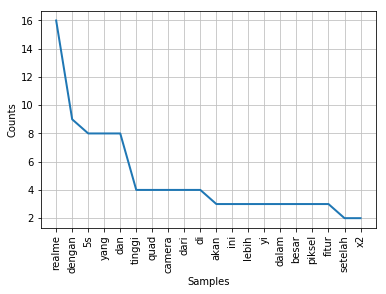

In [27]:
import matplotlib.pyplot as plt
kemunculan.plot(20,cumulative=False)
plt.show()

## Preprocessing
### Filtering (Stopword Removal)

In [83]:
stopwords = requests.get("https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt").text.split("\n")

In [84]:
text_stopword = []
words = caseFolding.split()
for word in words:
    if word not in stopwords: text_stopword.append(word)

In [85]:
resultFiltering = ' '.join(text_stopword)

### Result

In [86]:
print(resultFiltering)

partai keadilan sejahtera pks mendukung rencana menteri pendidikan kebudayaan nadiem makarim menghapus ujian nasional un catatan mendukung dihapuskannya un catatan keras wakil ketua majelis syuro pks hidayat nur wahid rapat koordinasi wilayah dpw pks jawa timur surabaya minggu menteri pendidikan kebudayaan nadiem makarim mengumumkan rencana mengganti un asesmen kompetensi minimum survei karakter hidayat pemerintah tergesa gesa menerapkan kebijakan penerapan kebijakan membutuhkan kajian mendalam berkaitan pembangunan sumber daya manusia terpenting kebijakan kebijakan rangka mendukung mendorong peningkatan kualitas pendidikan sumber daya manusianya efek input output nya wakil ketua mpr un dihapuskan pemerintah alternatif evaluasi ujian nasional dihapus pelajar malas termotivasi belajar hadirkan alternatif pelajar indonesia tumbuh berkualitas


## Preprocessing
### Stemming

In [87]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [88]:
# stemming process
output   = stemmer.stem(resultFiltering)

print(output)

partai adil sejahtera pks dukung rencana menteri didik budaya nadiem makarim hapus uji nasional un catat dukung hapus un catat keras wakil ketua majelis syuro pks hidayat nur wahid rapat koordinasi wilayah dpw pks jawa timur surabaya minggu menteri didik budaya nadiem makarim umum rencana ganti un asesmen kompetensi minimum survei karakter hidayat perintah gesa gesa terap bijak terap bijak butuh kaji dalam kait bangun sumber daya manusia penting bijak bijak rangka dukung dorong tingkat kualitas didik sumber daya manusia efek input output nya wakil ketua mpr un hapus perintah alternatif evaluasi uji nasional hapus ajar malas motivasi ajar hadir alternatif ajar indonesia tumbuh kualitas


## Comparing

In [89]:
print('Real Content')
print('==========================\n')
print(temp['content'])
print('Case Folding')
print('==========================\n')
print(caseFolding)
print()
print('Stemming ')
print('==========================\n')
print(output)

Real Content

TEMPO.CO, Jakarta - Partai Keadilan Sejahtera (PKS) menyatakan mendukung rencana Menteri Pendidikan dan Kebudayaan Nadiem Makarim menghapus Ujian Nasional (UN) dengan sejumlah catatan.

"Kami mendukung dihapuskannya UN, tapi tetap dengan catatan yang keras," kata Wakil Ketua Majelis Syuro PKS Hidayat Nur Wahid usai Rapat Koordinasi Wilayah DPW PKS Jawa Timur di Surabaya, Minggu.

Menteri Pendidikan dan Kebudayaan Nadiem Makarim mengumumkan rencana mengganti UN dengan Asesmen Kompetensi Minimum dan Survei Karakter mulai tahun 2021.

Hidayat mengatakan bahwa sebaiknya pemerintah tidak tergesa-gesa dalam menerapkan kebijakan tersebut. Penerapan kebijakan tersebut, menurut dia, membutuhkan kajian mendalam karena berkaitan dengan pembangunan sumber daya manusia.

"Yang terpenting juga, adanya kebijakan-kebijakan itu dalam rangka mendukung serta mendorong peningkatan kualitas pendidikan, sumber daya manusianya serta efek input maupun output-nya," kata Wakil Ketua MPR tersebut.


In [13]:
import pymongo

In [11]:
url = '''https://metro.tempo.co/read/1283868/anies-gowes-sepeda-bareng-warga-di-jakarta-timur'''

In [51]:
myClient = pymongo.MongoClient("mongodb://localhost:27017")
myDB = myClient.iStorage
myCollection = myDB.iAfter
collection = myDB.iData

In [53]:
iQuery = myCollection.find().limit(2)

In [54]:
data = []
for q in iQuery: data.append(q) 

In [55]:
data[0]['status'] = 'yes'

In [57]:
collection.insert(data[1])

/home/lumierra/Project-Python/.env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """Entry point for launching an IPython kernel.


ObjectId('5df595fc9623d3a94da6c0a9')

In [58]:
url = '''https://bisnis.tempo.co/read/1283856/menolak-jadi-bos-bumn-sandiaga-saya-tetap-bantu-erick-thohir'''

In [59]:
query = collection.find({
    'url' : url
})

In [60]:
temp = []
for q in query: temp.append(q)

In [62]:
type(data[1])

dict